# Call Center Cleanup

For this assignment, we will be working with call center data. You can start working on the assignment after the first lesson on Exploratory Data Analysis with pandas. Make sure to read the whole assignment before starting anything! As you code along in the Jupyter notebook, you are asked to make note of the results of your analysis. Do so by clicking on the results box and adding your notes beside each question.

## Business Issue and Understanding

You are working for a company that has two call centers: the North Call Center and the South Call Center. The company is looking to possibly hire five additional reps to enhance customer experience. Your task is to explore how efficient the current reps are in each branch to determine which branch would benefit from additional assistance.

### How the Call Center Works

Call center representatives are assigned queues. When calls are assigned to a queue, the call is assigned to the next person in line in the queue. After a call is assigned to a representative, the amount of time between assignment and the call starting is divided into busy minutes and not ready minutes. If the call is incoming and a customer is waiting on the phone for a rep, the time is split into three categories: busy minutes, not ready minutes, and incoming call wait time. Once the rep has the customer on the phone, there might be during call wait time, where the call is put on hold while the rep gets an answer for the customer.

### Notes about the Dataset

If you haven't worked in a call center before, these notes might help you throughout your analysis.

* The call purpose is tagged for each call.
* The time of the call is tagged in 1 hour blocks starting at 9:00 AM and ending at 5:00 PM.
* Calls are tagged as incoming or outgoing.
* Reps are assigned to queues. When the reps are working, they take calls in the order of their queue.
* A call that is dropped due to technical error or missed by the center because they have reached maximum capacity is a lost call.
* An abandoned call is when the customer hangs up because they have been waiting for too long.
* Busy Minutes: the amount of time after a call comes in or needs to go out where the assigned rep is not available because they are busy with other customers.
* Not Ready Minutes: the amount of time after a call comes in or needs to go out where the assigned rep is not available because they are not ready (for example, getting water).
* Incoming Wait Time - amount of time after assigned rep is available to take the call customer waits for representative to pick up a call. This is tracked in seconds.
* During Call Wait Time - amount of time during call that customer has to wait for representative

## Getting Started

You have two CSVs at your disposal, `NorthCallCenter.csv` and `SouthCallCenter.csv`. Import the appropriate libraries and create two dataframes, one called `north_df` and one called `south_df`.

In [103]:
# Import the appropriate libraries with aliases
import pandas as pd
import matplotlib as mpl
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Create two new dataframes

north_df = pd.read_csv(r'C:\Users\chris\PycharmProjects\call-center-cleanup-assignment\NorthCallCenter.csv')
south_df = pd.read_csv(r'C:\Users\chris\PycharmProjects\call-center-cleanup-assignment\SouthCallCenter.csv')

## Task 1: Exploratory Data Analysis

Time to do some EDA! In the process of learning more about the two datasets, answer the following questions. Use the code blocks below to begin cleaning your data. At the end of the section, record your answers.

#### EDA Question 1A:  How many reps are in the North branch?

In [7]:
# EDA Question 1A solution below:
north_df.head()


unique_reps = north_df['Rep ID'].unique()
print('Num of reps in North branch: ', len(unique_reps))
unique_reps

Num of reps in North branch:  9


array(['Brent', 'Cam', 'Todd', 'Duke', 'Joe', 'Lilly', 'Amanda', 'Andy',
       'Xander'], dtype=object)

#### EDA Question 1B:  How many reps are in the South branch?  

In [8]:
# EDA Question 1B solution Below:
unique_reps_south = south_df['Rep ID'].unique()
print('Num of reps in South branch: ', len(unique_reps_south))
unique_reps_south

Num of reps in South branch:  11


array(['Kate', 'Eric', 'Susan', 'Alice', 'Sandy', 'Karl', 'Randy',
       'George', 'Helga', 'Josh', 'Sharon'], dtype=object)

#### EDA Question 2A:  What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for the North branch? 

In [14]:
# EDA Question 2A solution Below:
north_average_minutes = north_df[['Busy Minutes', 'Not Ready Minutes', 'Incoming Wait Time', 'During Call Wait Time']].mean().round(2)
north_average_minutes

Busy Minutes             9.99
Not Ready Minutes        1.91
Incoming Wait Time       3.05
During Call Wait Time    2.97
dtype: float64

#### EDA Question 2B:  What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for the South branch? 

In [15]:
# EDA Question 2B solution Below:
south_average_minutes = south_df[['Busy Minutes', 'Not Ready Minutes', 'Incoming Wait Time', 'During Call Wait Time']].mean().round(2)
south_average_minutes

Busy Minutes             10.05
Not Ready Minutes         1.91
Incoming Wait Time        3.00
During Call Wait Time     3.08
dtype: float64

#### EDA Question 3:  What is the number of calls taken for each time block(Both North and South combined)?

In [32]:
# EDA Question 3 solution Below:
initial_concatenated_df = pd.concat([north_df, south_df])

call_count = initial_concatenated_df.groupby("Time Block").size().reset_index(name='Total Calls')

call_count = call_count.sort_values(by='Time Block', ascending=True)

print(call_count)

  Time Block  Total Calls
0   10:00 AM           99
1   11:00 AM           56
2   12:00 PM          120
3    1:00 PM           40
4    2:00 PM           65
5    3:00 PM           73
6    4:00 PM           53
7    5:00 PM           43
8    9:00 AM           10


##### Record your answers for the EDA section below:
- 1a) Reps in the North Branch = 9
- 1b) Reps in the South Branch = 11


- 2a) North Branch, (round to the nearest hundredth):
> - Busy Minutes = 9.99
> - Not Ready Minutes = 1.91
> - Incoming Wait Time = 3.05
> - During Call Wait Time = 2.97
- 2b) South Branch, (round to the nearest hundredth):
> - Busy Minutes = 10.05
> - Not Ready Minutes = 1.91
> - Incoming Wait Time = 3.00
> - During Call Wait Time = 3.08
- 3) Total Calls taken for all branches per time block:
> - 9:00AM   = 10
> - 10:00AM  = 99
> - 11:00AM  = 56
> - 12:00PM  = 120
> - 1:00PM   = 40
> - 2:00PM   = 65
> - 3:00PM   = 73
> - 4:00PM   = 53
> - 5:00PM   = 43



## Task 2: Cleaning Your Data 
Now you need to clean up the datasets. When cleaning the datasets, you may find that there isn't dirty data to clean. That is okay! Some questions you need to answer about the data sets.
* Add additional code blocks as needed to show how you came to your conclusions. Add comments in your code blocks to help others understand your thinking. 

#### Cleaning Question 1:  Is there any missing data and if yes explain what you would do with the missing data and why?

In [24]:
# Question 1 solution below

for col in initial_concatenated_df.columns:
    pct_missing = np.mean(initial_concatenated_df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

# Used a for loop to iterate through both dataframe in order to identify the % of nulls per column

Unnamed: 0 - 0%
Branch - 0%
Call Purpose - 0%
Time Block - 0%
Incoming or Outgoing - 0%
Queue - 0%
Rep ID - 0%
Sale - 0%
Lost Call - 0%
Abandoned - 0%
Busy Minutes - 0%
Not Ready Minutes - 0%
Incoming Wait Time - 63%
During Call Wait Time - 0%
Calls - 0%


#### Record your answer below:

> Your Answer: Incoming Wait Time is 63% empty. I would leave this as-is. I can code in something like if: na then mark as no wait time as needed. NOTE: I replace empties with 0's later in the project.

#### Cleaning Question 2:  In the North data set, there are two separate "YES" values for a sale. Why and how did you rectify the issue?

In [31]:
# Cleaning Question 2 solution below:

north_df['Sale'] = north_df['Sale'].str.strip()

for col in north_df.columns:
    uniques = north_df[col].unique()
    print('{}: {}'.format(col, uniques))

# Used a for loop to iterate through the relevant datadrame in order to confirm extra yes and then to confirm removing extra yes had been successful. Used string strip to remove the trailing whitespace.

Unnamed: 0: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 24

##### Record your answer by below:
> Your Answer: One yes has trailing whitespace. Used .str.strip() to standardize the YES's :)

#### Cleaning Question 3:  Are there duplicates in the two data sets? If there are, how did you handle them?

In [55]:
# Cleaning Question 3 solution below:

# duplicate_mask = north_df.duplicated(keep=False)
# duplicates_df = north_df[duplicate_mask]
# print(duplicates_df)

# duplicate_mask = initial_concatenated_df.duplicated(keep=False)
# duplicates_df = initial_concatenated_df[duplicate_mask]
# print(duplicates_df)

# initial_concatenated_df[initial_concatenated_df.duplicated(keep='first')]

# dupe_summary = (initial_concatenated_df
#                 .groupby(list(north_df.columns), dropna=False)
#                 .size()
#                 .reset_index(name='count')
#                 .query("count > 1"))
# print(dupe_summary)

# north_df_copy = north_df
# north_df_copy[north_df_copy.duplicated(keep=False)].index.tolist()

# the above code represents me vigorously searching for entire-row duplicates.
# Index: [] indicates there were none

Empty DataFrame
Columns: [Unnamed: 0, Branch, Call Purpose, Time Block, Incoming or Outgoing, Queue, Rep ID, Sale, Lost Call, Abandoned, Busy Minutes, Not Ready Minutes, Incoming Wait Time, During Call Wait Time, Calls, count]
Index: []


##### Record your answer below:
> Your Answer: I was unable to find any genuine entire-row-level duplicates, and I searched vigorously. There were duplicates within the columns, but naturally columns with a handful of possible values will have duplicates and as-such I didn't consider those to be good-faith answers to the spirit of this question.

#### Cleaning Question 4:  Is any of the data in the two data sets unnecessary? If yes, how did you handle it?

In [58]:
# Cleaning Question 4 solution below:

# for col in initial_concatenated_df.columns:
#     uniques = initial_concatenated_df[col].unique()
#     print('{}: {}'.format(col, uniques))

north_df_cleaned = north_df.drop(['Unnamed: 0', 'Calls'], axis=1)
south_df_cleaned = south_df.drop(['Unnamed: 0', 'Calls'], axis=1)

# north_df_cleaned.columns
south_df_cleaned.columns

# I looked through the uniques to see what values lived in the columns. Any one that didn't seem very useful I dropped.

Index(['Branch', 'Call Purpose', 'Time Block', 'Incoming or Outgoing', 'Queue',
       'Rep ID', 'Sale', 'Lost Call', 'Abandoned', 'Busy Minutes',
       'Not Ready Minutes', 'Incoming Wait Time', 'During Call Wait Time'],
      dtype='object')

##### Record your answer below:
> Your Answer: 'Calls' and 'Unnamed' were unnecessary, so I dropped them.

## Task 3: Data Manipulation
Before you begin answering any questions, combine the two datasets together to create a third dataframe called df. You can use this third dataframe to compare the two call centers to company-wide trends.
* Add additional code blocks as needed to show how you came to your conclusions. Add comments in your code blocks to help others understand your thinking. Record your answer below.

In [60]:
# Create dataframe for the entire company named df

df = pd.concat([north_df_cleaned, south_df_cleaned]) # concat made sense for our data

for col in df.columns:
    uniques = df[col].unique()
    print('{}: {}'.format(col, uniques)) # just triple checking there's nothing weird in the data

df.shape # confirming heuristically that the new shape is roughly the size of the two constituents

Branch: ['North' 'South']
Call Purpose: ['Complaint' 'Sales Support' 'Product Support']
Time Block: ['9:00 AM' '11:00 AM' '4:00 PM' '12:00 PM' '2:00 PM' '3:00 PM' '1:00 PM'
 '10:00 AM' '5:00 PM']
Incoming or Outgoing: ['Incoming' 'Outgoing']
Queue: ['B' 'A' 'D' 'C']
Rep ID: ['Brent' 'Cam' 'Todd' 'Duke' 'Joe' 'Lilly' 'Amanda' 'Andy' 'Xander' 'Kate'
 'Eric' 'Susan' 'Alice' 'Sandy' 'Karl' 'Randy' 'George' 'Helga' 'Josh'
 'Sharon']
Sale: ['NO' 'YES']
Lost Call: [0 1]
Abandoned: [1 0]
Busy Minutes: [ 9 11  8 12 10]
Not Ready Minutes: [2 1 3]
Incoming Wait Time: [ 1.  2.  3.  4.  5. nan]
During Call Wait Time: [4 3 2]


(559, 13)

#### Manipulation Question 1:  Group by Rep ID and sum the resulting structure. Sort by calls to determine which rep in each branch has the highest number of calls.

In [68]:
# Manipulation Question solution below:

# call_count_by_rep = df.groupby("Rep ID").size().reset_index(name='Total Calls')
#
# call_count_by_rep = call_count_by_rep.sort_values(by='Total Calls', ascending=False)
#
# print(call_count_by_rep)

call_count_by_rep = north_df_cleaned.groupby("Rep ID").size().reset_index(name='Total Calls, North')

call_count_by_rep = call_count_by_rep.sort_values(by='Total Calls, North', ascending=False)

print(call_count_by_rep)

call_count_by_rep = south_df_cleaned.groupby("Rep ID").size().reset_index(name='Total Calls, South')

call_count_by_rep = call_count_by_rep.sort_values(by='Total Calls, South', ascending=False)

print(call_count_by_rep)

# Used groupby rep_id by size of rows with their name (because every row is a call) to figure this one out

   Rep ID  Total Calls, North
2   Brent                  37
6   Lilly                  30
7    Todd                  29
4    Duke                  29
5     Joe                  26
8  Xander                  24
3     Cam                  24
0  Amanda                  23
1    Andy                  23
    Rep ID  Total Calls, South
1     Eric                  35
7    Randy                  33
8    Sandy                  32
3    Helga                  31
2   George                  29
6     Kate                  29
5     Karl                  28
10   Susan                  26
4     Josh                  26
9   Sharon                  25
0    Alice                  20


##### Record your answer below
Rep with the hightest number of calls and their total calls:
- North Branch = Brent : 37
- South Branch =

#### Manipulation Question 2:  The average call abandonment rate is a KPI when it comes to determining call center efficiency. As you may recall, abandoned calls are calls where the customer hangs up due to long call times. What is the average call abandonment rate for each branch and the whole company? Do any of these fall out of the optimal range of 2-5%?

In [72]:
# Manipulation Question 2 solution below:

# Use column : 'Abandoned'

abandonment_rate_company = np.mean(df['Abandoned'])
print('{} - {}%'.format('Abandonment Rate, Company Wide', round(abandonment_rate_company*100, 2)))

abandonment_rate_north = np.mean(north_df_cleaned['Abandoned'])
print('{} - {}%'.format('Abandonment Rate, North', round(abandonment_rate_north*100, 2)))

abandonment_rate_south = np.mean(south_df_cleaned['Abandoned'])
print('{} - {}%'.format('Abandonment Rate, South', round(abandonment_rate_south*100, 2)))

# Used .mean and .format for this one. This one was straightforward.

Abandonment Rate, Company Wide - 1.97%
Abandonment Rate, North - 2.86%
Abandonment Rate, South - 1.27%


##### Record your answer below:
Average Call Abandonment Rates (round to the nearest hundredth):
- North Branch = 2.86%
- South Branch = 1.27%
- Company Wide = 1.97%
- Do any of these fall out of the optimal range of 2-5%?
- Yes, the South is below the optimal range.

#### Manipulation Question 3:  Service level is another KPI when it comes to measuring call center efficiency. Service level is the percentage of calls answered within a specific number of seconds. In the case of your employer, their ideal time frame is 2 seconds. What is the percentage of calls answered within 2 seconds for each branch and the entire company?

In [160]:
# Manipulation Question 3 solution below:

# Use : 'Incoming Wait Time' Values: [ 1.  2.  3.  4.  5. nan]
# Pct of calls (all rows) with an 'Incoming Wait Time' value of < 2.0

north_df_filled = north_df_cleaned.fillna(0)
south_df_filled = south_df_cleaned.fillna(0)
df_filled = df.fillna(0)

mask = df_filled['Incoming Wait Time'].le(2.0)
count_calls = int(mask.sum())
total_calls = int(df_filled['Incoming Wait Time'].count())
service_level = count_calls / total_calls
print(f"Service Level, Company Wide — {service_level*100:.2f}% ({count_calls} of {total_calls} calls)")

mask = north_df_filled['Incoming Wait Time'].le(2.0)
count_calls = int(mask.sum())
total_calls = int(north_df_filled['Incoming Wait Time'].count())
service_level = count_calls / total_calls
print(f"Service Level, North — {service_level*100:.2f}% ({count_calls} of {total_calls} calls)")

mask = south_df_filled['Incoming Wait Time'].le(2.0)
count_calls = int(mask.sum())
total_calls = int(south_df_filled['Incoming Wait Time'].count())
service_level = count_calls / total_calls
print(f"Service Level, South — {service_level*100:.2f}% ({count_calls} of {total_calls} calls)")

# df_filled.shape
# 628 != 559

# Same thing as the one before except a little fanicer. Used f string instead of format, .2f to round, used boolean masks to filter the data and le to indicate less than or equal to. I also filled the nan's here too to make the task easier.

Service Level, Company Wide — 77.28% (432 of 559 calls)
Service Level, North — 80.00% (196 of 245 calls)
Service Level, South — 75.16% (236 of 314 calls)


##### Record your answer below:
Percentage of calls answered within 2 seconds, include # of calls:
- North Branch = 80.00% (196 of 245 calls)
- South Branch = 75.16% (236 of 314 calls)
- Company Wide = 77.28% (432 of 559 calls)

#### Manipulation Question 4: For each branch and the entire company, what is the average speed of answer?

In [89]:
# Manipulation Question 4 solution below:

average_answer_speed_company = np.mean(df_filled['Incoming Wait Time'])
print(f"Average Answer Speed, Company — {average_answer_speed_company.round(2)} seconds")

average_answer_speed_north = np.mean(north_df_filled['Incoming Wait Time'])
print(f"Average Answer Speed, North — {average_answer_speed_north.round(2)} seconds")

average_answer_speed_south = np.mean(south_df_filled['Incoming Wait Time'])
print(f"Average Answer Speed, South — {average_answer_speed_south.round(2)} seconds")

# Used .mean on the new cleaned data. Throw an f string in with a round and this one wrapped up handily :)

Average Answer Speed, Company — 1.12 seconds
Average Answer Speed, North — 1.02 seconds
Average Answer Speed, South — 1.2 seconds


##### Record your answer by below:
Average speed of answer (rounded to nearest hundredth):
- North Branch in seconds = 1.02 seconds
- South Branch in seconds = 1.20 seconds
- Company Wide in seconds = 1.12 seconds

## Task 4: Visualization

Create a visualization for each of the following questions. Some of the code to handle aggregating and storing data may be written for you. For each visualization, you choose the chart style that you feel suits the situation best. Make note of the chart style you chose and why. 

*NOTE Some questions you may decide to use more than one chart and or chart style.

#### Visualization 1:  What is the average abandonment rate per queue?

Text(0.5, 1.0, 'Abandonment Rate by Queue')

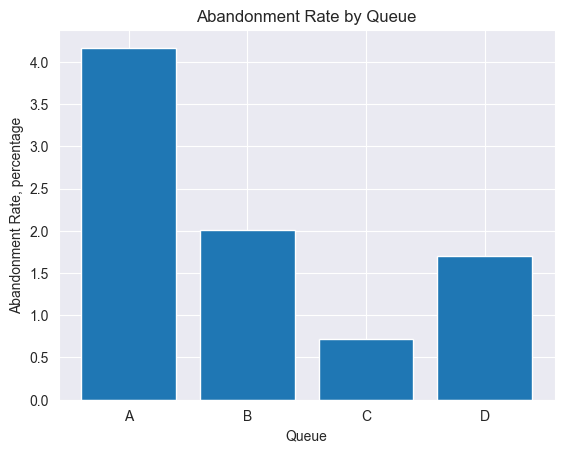

In [107]:
# Create visualization 1 here
# Import any additional libraries needed with alias

# The starter code didn't work for me because I dropped calls, so I rewrote it

queues = df['Queue'].unique().tolist()

rates_df = (df.groupby('Queue').agg(abandoned = ('Abandoned', 'sum'),calls = ('Queue', 'size'))
              .assign(abandon_rate = lambda x: (x['abandoned'] / x['calls']*100)))

# print(rates_df)
abandonment_rates_by_queue = rates_df['abandon_rate'].to_dict()
# print(abandonment_rates_by_queue)

plt.bar(abandonment_rates_by_queue.keys(), abandonment_rates_by_queue.values())
plt.xlabel('Queue')
plt.ylabel('Abandonment Rate, percentage')
plt.title('Abandonment Rate by Queue')

##### Record your answer below:

> Chart style you chose and why: I chose a bar because it's an elegant and classic way to compare relative values.

#### Visualization 2: What is the service level percentage and average speed of answer for each rep in the North Branch?

Text(0.5, 1.0, 'Avg Wait Time by Representative')

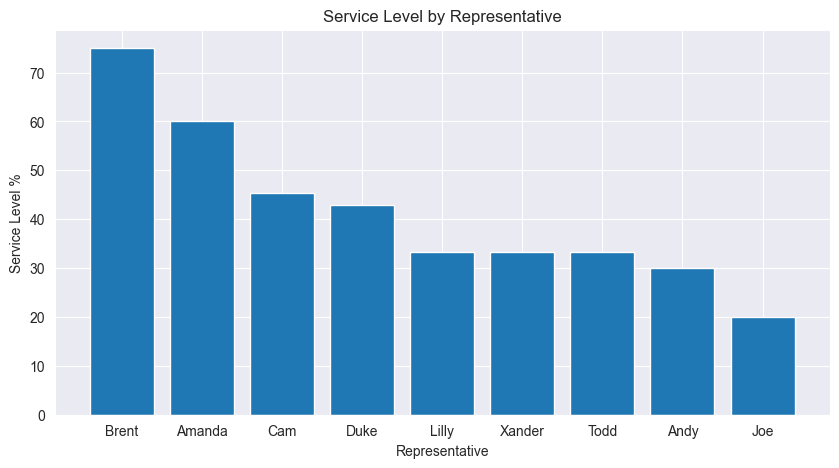

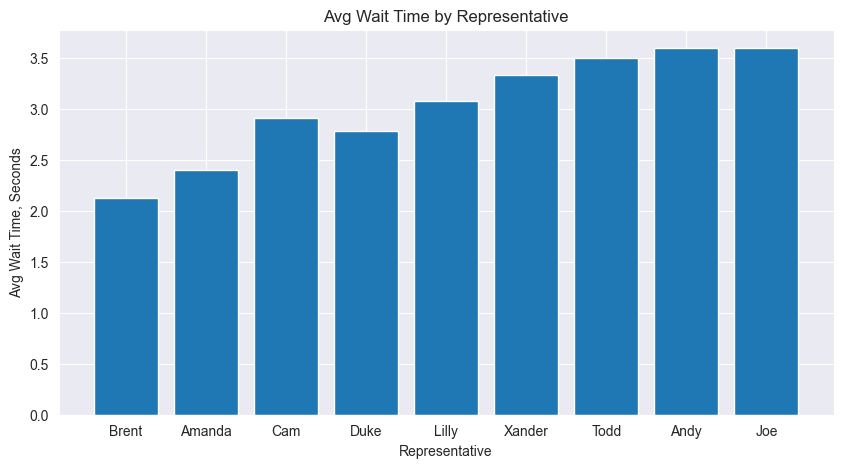

In [131]:
# Create visualization 2 here

north = north_df.drop(['Unnamed: 0'], axis=1).fillna(0)

# I rewrote the starter code because it didn't produce coherent data

# These create masks for our KPIs
incoming_mask = north['Incoming or Outgoing'] == 'Incoming'
quick_incoming_mask = incoming_mask & (north['Incoming Wait Time'] <= 2.0)
avg_wait = (north[incoming_mask].groupby('Rep ID')['Incoming Wait Time'].mean().rename('Avg Wait Time'))


# Where total_call_per_rep are total incoming calls per rep
total_calls_per_rep = north[incoming_mask].groupby('Rep ID').size().rename('total_calls')
# Where quick_call_per_rep are incoming calls per rep answered in equal to or less than two seconds
quick_calls_per_rep = north[quick_incoming_mask].groupby('Rep ID').size().rename('quick_calls')


# Now we combine them all
service_level = pd.concat([quick_calls_per_rep, total_calls_per_rep], axis=1).fillna(0)
service_level['Service Level %'] = service_level['quick_calls'] / service_level['total_calls'] * 100
service_level = service_level.merge(avg_wait, on='Rep ID', how='left')


# I sorted them for the stakeholder
service_level = service_level.sort_values('Service Level %', ascending=False)

# This is where I'll code the visualizations:
plt.figure(figsize=(10, 5))
plt.bar(service_level.index, service_level['Service Level %'])
plt.xlabel('Representative')
plt.ylabel('Service Level %')
plt.title('Service Level by Representative')

plt.figure(figsize=(10, 5))
plt.bar(service_level.index, service_level['Avg Wait Time'])
plt.xlabel('Representative')
plt.ylabel('Avg Wait Time, Seconds')
plt.title('Avg Wait Time by Representative')

# service_level

##### Record your answer below:

> Chart style you chose and why: I used an ordered bar graph for both. I did this because it clearly communicates rank. I felt that rank was naturally the aspect we wanted to understand most from this prompt. I would do an ordered lollipop graph in Tableau for the final viz, but doing that in Python was too fiddly.

#### Visualization 3: For each type of call purpose, how many calls are outgoing vs. incoming?

Call Purpose     Incoming or Outgoing
Complaint        Incoming                 51
Product Support  Outgoing                228
                 Incoming                 82
Sales Support    Outgoing                123
                 Incoming                 75
Name: count, dtype: int64


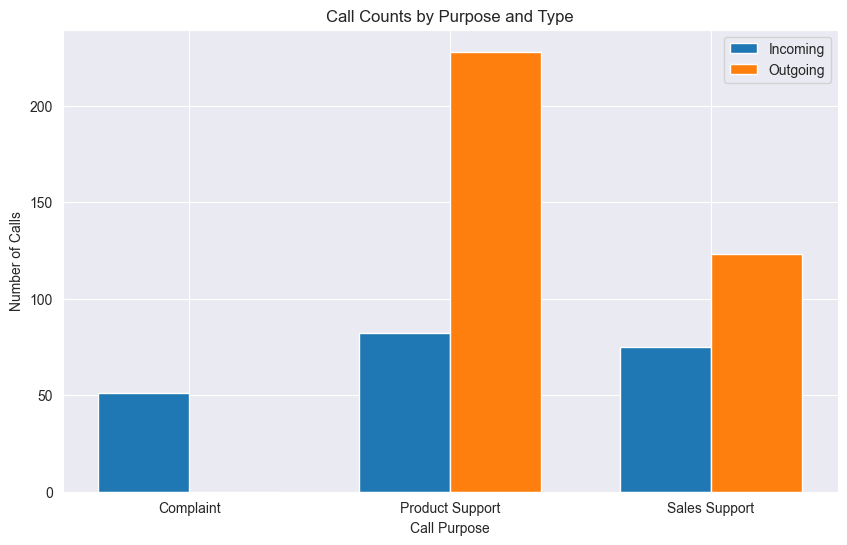

In [142]:
# Create visualization 3 here:
# The three dictionaries, complaints, sales_support, and product_support, have the information you need

purpose_group = df.groupby("Call Purpose")
purpose_counts = purpose_group["Incoming or Outgoing"].value_counts()
print(purpose_counts)

complaints = purpose_counts["Complaint"].to_dict()
sales_support = purpose_counts["Sales Support"].to_dict()
product_support = purpose_counts["Product Support"].to_dict()

#Your Code Here:

categories = ["Complaint", "Product Support", "Sales Support"]

incoming_counts = [complaints.get('Incoming', 0), product_support.get('Incoming', 0), sales_support.get('Incoming', 0)]

outgoing_counts = [complaints.get('Outgoing', 0), product_support.get('Outgoing', 0), sales_support.get('Outgoing', 0)]

x = np.arange(len(categories))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))

# Plot Incoming bars shifted to the left
rects1 = ax.bar(x - width/2, incoming_counts, width, label='Incoming')

# Outgoing will be a little to the right
rects2 = ax.bar(x + width/2, outgoing_counts, width, label='Outgoing')


ax.set_ylabel('Number of Calls')
ax.set_xlabel('Call Purpose')
ax.set_title('Call Counts by Purpose and Type')
ax.set_xticks(x)
ax.set_xticklabels(categories)
ax.legend()

plt.show()

##### Record your answer below:

> Chart style you chose and why: I did a grouped bar chart, because both values (call purpose and outgoing/incoming) were measured by number of calls, so it felt natural to reach for a grouped bar chart. I feel this communicates the data best, and my resources seem to agree.

## Task 5: Summarize Your Work

With what you know now about the two call centers and the entire company, answer the following questions. Note that while this is subjective, you should include relevant data to back up your opinion.


#### Summary Question 1:  Using KPIs such as average abandonment rate, service level and average speed of answer, in your opinion, which one of the two branches is operating more efficiently? Why?

##### Record your answer below:
> Your Answer:

> Average Abandonment Rate winner: North.

> Service Level winner: North.

> Average Speed of Answer winner: North.

> The North operates more efficiently by every available metric. Their Average abandonment rate is in the optimal band, their service level is around 5% higher, and their average speed of answer is around 20% higher than their peers in the South.



#### Summary Question 2: Based on the number of reps in each branch and how quickly the reps are working, in your opinion, which branch would benefit from the extra help?

##### Record your answer below:
> Your Answer: The North. They have a culture of being fast and efficient, as touched on in-depth in the answer above this one. New hires in the North will likely outperform their Southern peers based on the small amount of data we have. Note: The amount of representatives and calls studied here is not enough for an actionable Confidence Interval, all my answers here should be treated as baseless conjecture for the purposes of completing an assignment.


#### Summary Question 3: Now that you have explored the datasets, is there any data or information that you wish you had in this analysis?

##### Record your answer below:
> Your Answer: I wish I had a million more Reps for each branch. Lacking that, I would settle for 21 more reps for the North, and 19 more reps in the South with at least 30 calls per rep in order to draw conclusions that are marginally insightful. I wish I knew a data scientist who could tell me if I could substitute reps for years worked or some other metric that would allow us to draw conclusions not subject to the dreaded sample size bias or woeful randomness.

## Bonus Mission
Create a visualization that answers this question: For each call purpose, how many calls (incoming and outgoing) take place in each time block?
##### Record your answer below:

> Chart style you chose and why: Multiple line. Because this is a textbook example of change over time, which is best communicated by line graph. Further, multiple metrics we wanted to track over time was a natural fit for the multiple line graph.

<Figure size 1400x1000 with 0 Axes>

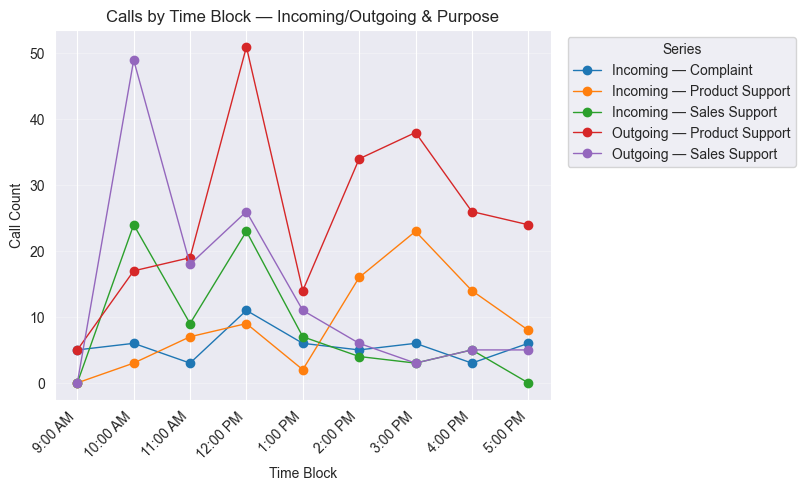

In [156]:
# Create your Bonus Mission visualization here!
south = south_df.drop(['Unnamed: 0'], axis=1).fillna(0)

bonus_df = pd.concat([north, south])

call_times = bonus_df[["Time Block", "Call Purpose", "Incoming or Outgoing", "Calls"]]

call_counts = (call_times.groupby(['Time Block', 'Incoming or Outgoing', 'Call Purpose']).size().reset_index(name='Call Count'))

call_counts['series_label'] = (call_counts['Incoming or Outgoing'].astype(str) + " — " + call_counts['Call Purpose'].astype(str))

pivot = call_counts.pivot_table(index='Time Block', columns='series_label', values='Call Count', aggfunc='sum', fill_value=0)

desired_order = ["9:00 AM", "10:00 AM", "11:00 AM", "12:00 PM", "1:00 PM", "2:00 PM", "3:00 PM", "4:00 PM", "5:00 PM"]
pivot = pivot.reindex(desired_order).fillna(0)

plt.figure(figsize=(14, 10))
ax = pivot.plot(kind='line', marker='o', linewidth=1)
ax.set_title("Calls by Time Block — Incoming/Outgoing & Purpose")
ax.set_xlabel("Time Block")
ax.set_ylabel("Call Count")
ax.grid(axis='y', alpha=0.3)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Series', bbox_to_anchor=(1.02, 1), loc='upper left')

plt.show()